In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('Publicacions Facebook Thailandia.csv')

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Estudi del dataframe

El dataframe conté informació sobre publicacions a Facebook fetes a Tailàndia. Les variables són les següents:

**status_id**: nombre d'identificació de la publicació.

**status_type**: tipus de publicació.

**status_published**: l'hora i la data en què es va publicar.

**num_reactions**: quantitat de reaccions (suma de num_likes, num_loves, num_wows, num_hahas, num_sads i num_angrys).

**num_comments**: quantitat de comentaris.

**num_shares**: quantitat de vegades que s'ha compartit.

**num_likes**: quantitat de likes.

**num_loves**: quantitat d'emoticones del cor.

**num_wows**: quantitat d'emoticones de sorpresa.

**num_hahas**: quantitat d'emoticones de riure.

**num_sads**: quantitat d'emoticones de tristesa.

**num_angrys**: quantitat d'emoticones d'enfadament.

**Column1**, **Column2**, **Column3** i **Column4** estàn buides.

In [2]:
# Informació sobre el nombre de columnes, de files i el seu tipus de dada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

El dataframe consta de 16 columnes i 7050 files.

'status_id', 'status_type' i 'status_published' són de tipus objecte.

'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads' i 'num_angrys' són de tipus int.

'Column1', 'Column2', 'Column3' i 'Column4' són de tipus float.

In [3]:
# Descripció estadística del dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podem comprovar que les 4 últimes variables estàn buides. 

També veiem que els "num_reactions" i "num_comments" tenen una gran variabilitat, fet que indica que algunes publicacions generen moltes reaccions i comentaris, mentre que altres no reben cap reacció ni cap comentari.

Pel que fa a la variable "num_shares", la majoria de les observacions es troben en el rang de 0 a 4.

En les variables "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads" i "num_angrys" s'observa que la majoria de les tenen un valor de 0, el que indica que és menys comú tenir una reacció específica en comparació amb els likes (num_likes).

In [4]:
# Comprovem que no hi hagi valors nulls (no cal fer isna(), ja que a pandas isnull() i isna() és equivalent)

df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Com hem dit abans, les 4 últimes variables estàn buides. La resta de variables no tenen nulls.

In [5]:
# Comprovem si hi ha duplicats

df.duplicated().sum()

51

Tenim 51 entrades duplicades.

In [6]:
# Mirem el nombre de valors únics en cada columna per a trobar columnes susceptibles de ser transformades en dummies

df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

'status_type' té només 4 valors únics, per tant podria ser transformada en dummy.

### Neteja i visualització

In [7]:
# Fem copia abans de la neteja per no modificar el dataframe original

df_copy = df.copy()

In [8]:
# Eliminem els duplicats

df_copy = df_copy.drop_duplicates().reset_index(drop=True)

In [9]:
# Eliminem les columnes buides (per motius obvis) i també les variables 'status_id' i 'status_published', 
# ja que els clusters que crearem no tindràn en compte ni usuari ni hora en el que s'han publicat

df_copy = df_copy.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [10]:
# Transformem 'status_type' en dummies i eliminem una d'elles per evitar la multicolinealitat

df_copy = pd.get_dummies(df_copy, columns=["status_type"], drop_first=True)

df_copy.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,1
1,150,0,0,150,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,1,0,0


In [11]:
# Tornem a fer un df.info() per veure com ha quedat el dataframe

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       6999 non-null   int64
 1   num_comments        6999 non-null   int64
 2   num_shares          6999 non-null   int64
 3   num_likes           6999 non-null   int64
 4   num_loves           6999 non-null   int64
 5   num_wows            6999 non-null   int64
 6   num_hahas           6999 non-null   int64
 7   num_sads            6999 non-null   int64
 8   num_angrys          6999 non-null   int64
 9   status_type_photo   6999 non-null   uint8
 10  status_type_status  6999 non-null   uint8
 11  status_type_video   6999 non-null   uint8
dtypes: int64(9), uint8(3)
memory usage: 512.7 KB


Finalment ens queda un dataframe de 12 columnes i 6999 entrades, amb 9 variables de tipus int i 3 dummies.

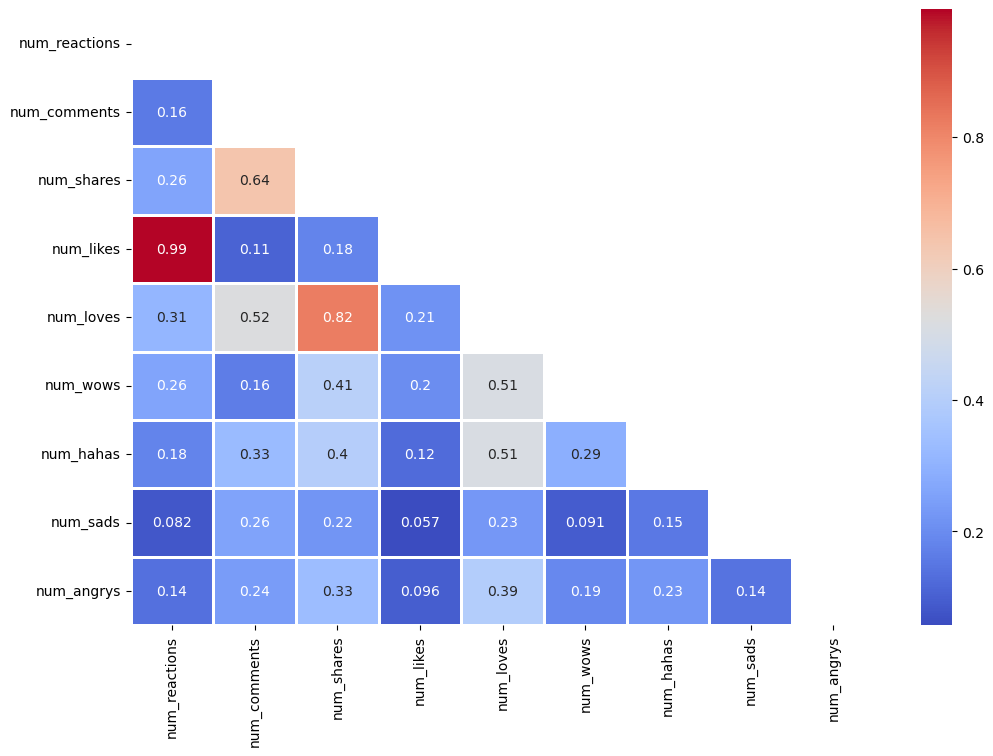

In [12]:
# Fem un mapa de calor de les variables numèriques per veure les seves correlacions

var_numeriques = df_copy[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
                          'num_hahas', 'num_sads', 'num_angrys']]


plt.figure(figsize=(12, 8))
corr_matrix = var_numeriques.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', linewidths=1, linecolor='white', annot=True)
plt.show()

Els 3 parells de valors més correlacionats són:


- num_likes amb num_reactions, amb una correlació quasi perfecta (0.99). Això podria ser degut a que fa un temps el like era la única reacció possible, apart que també és la més instàntania (un click).


- num_loves i num_shares, també estàn altament correlacionats (0.82), ja que normalment tendim a compartir el que ens encanta.


- num_shares i num_comments (0.64), ja que sol passar que les publicacions més compartides solen rebre més comentaris.


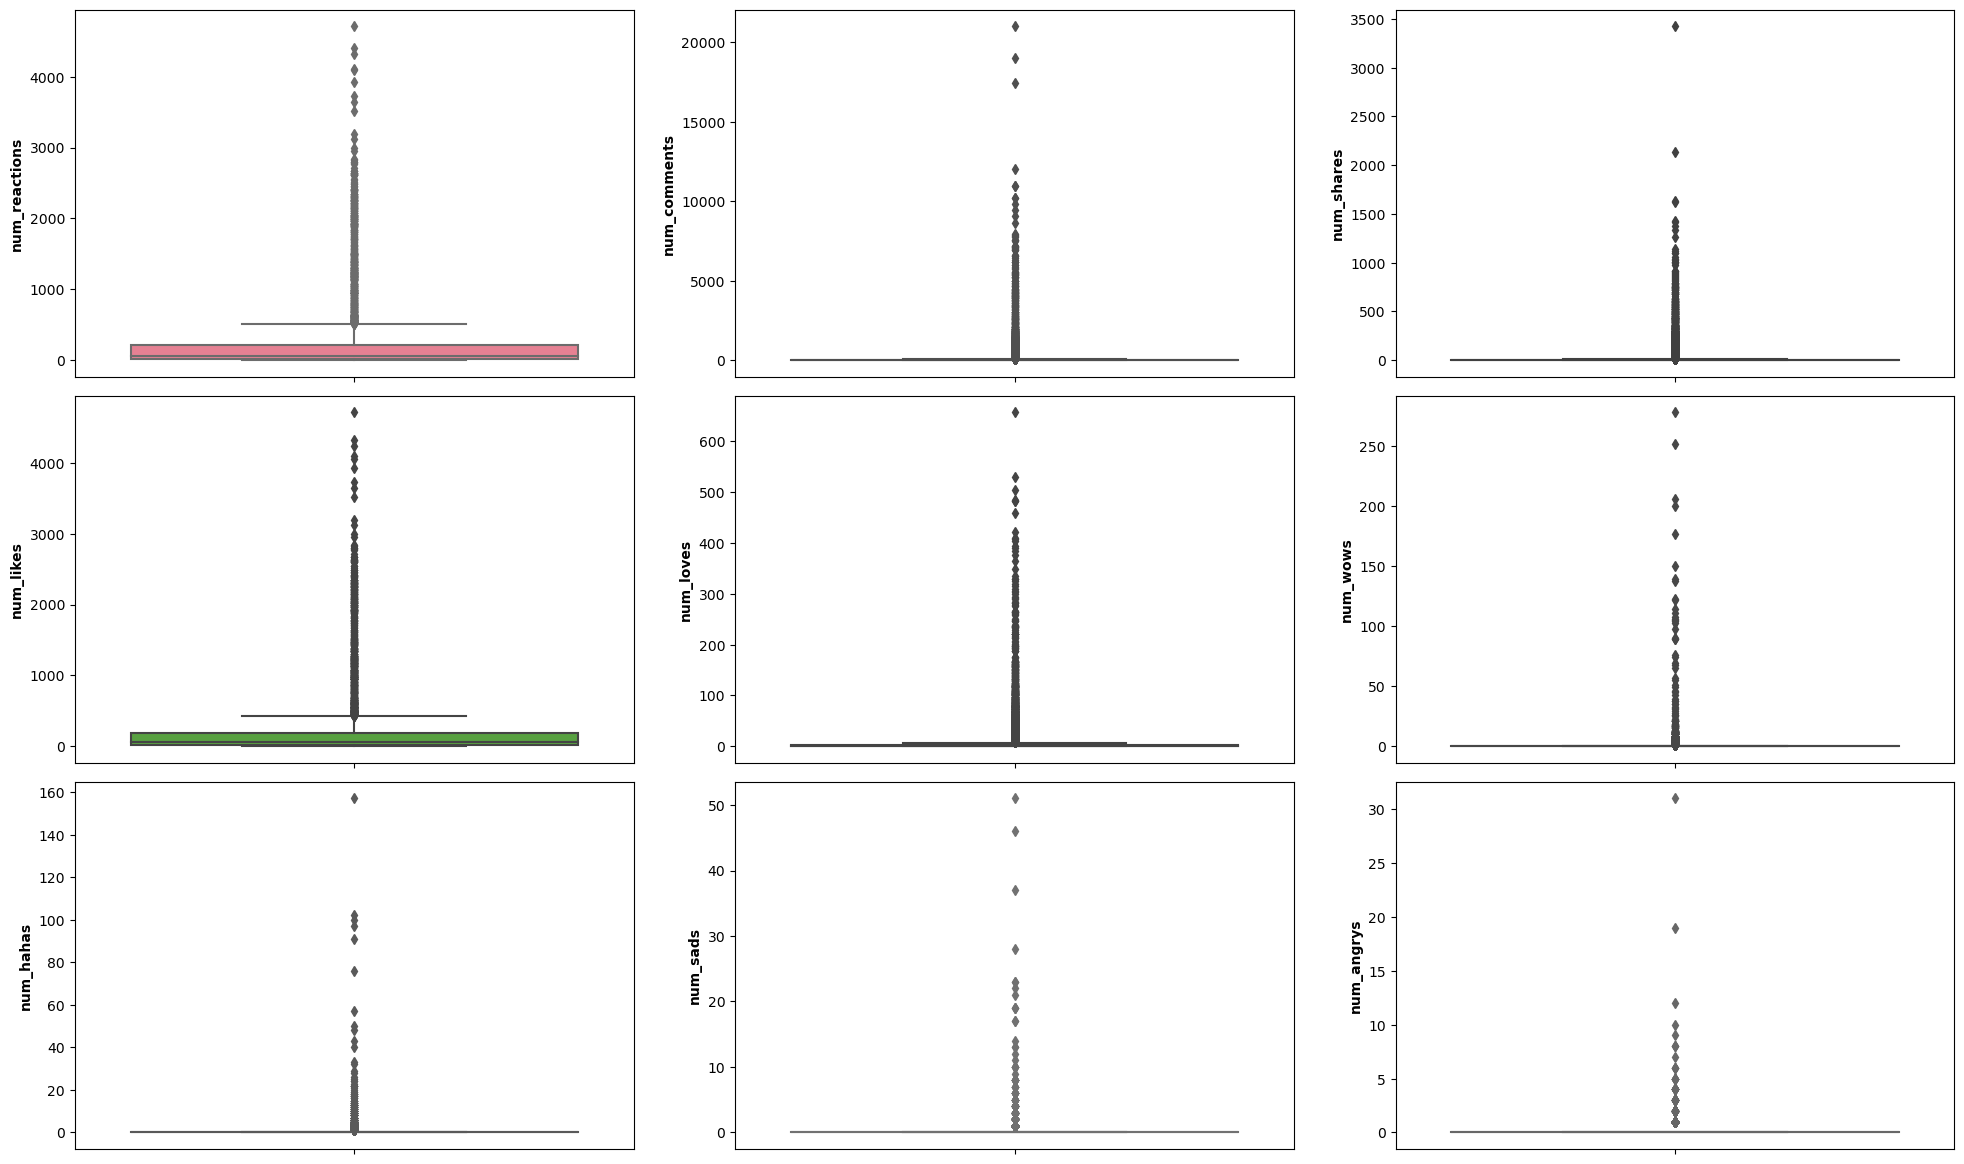

In [13]:
# Fem un boxplot de les variables que seleccionarem per veure els outliers que tenen

colors = sns.color_palette("husl", len(var_numeriques.columns))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 12))
count = 0
axs = axs.flatten()

for i, column in enumerate(var_numeriques):
    sns.boxplot(y=column, data=var_numeriques, ax=axs[count], color=colors[i])
    axs[count].set_ylabel(column, fontweight='bold')
    count += 1

plt.tight_layout(pad=2, w_pad=2, h_pad=1)
plt.show()

Totes les variables tenen outliers, per tant haurem d'aplicar RobustScaler.

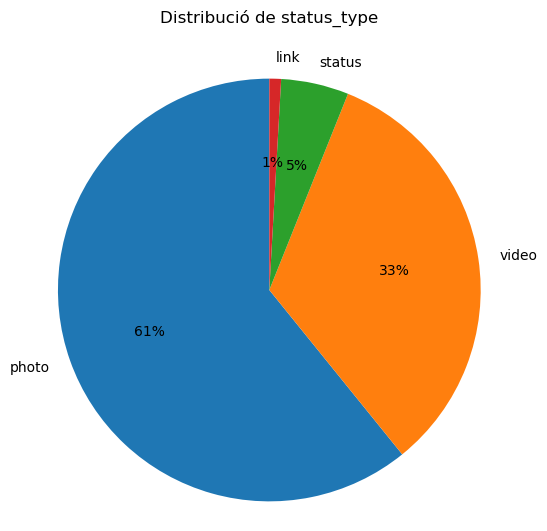

In [14]:
status_counts = df['status_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.0f%%', startangle=90)
plt.title("Distribució de status_type", pad=26)
plt.axis('equal')
plt.show()

La gran majoria de publicacions són fotos (61%) seguit de videos (33%). Links i status amb prou feines arriben a un 6% si les sumem.

In [15]:
df_status = df.groupby('status_type').sum()[['num_reactions', 'num_comments', 'num_shares']]
df_status = df_status.reset_index()
df_status

,status_type,num_reactions,num_comments,num_shares
0,link,23319,359,277
1,photo,777373,68580,10951
2,status,160156,13227,934
3,video,661478,1499544,269997


En aquest dataframe podem veure en valors absoluts la quantitat de reaccions, comentaris i vegades que s'ha compartit segons el tipus de publicació. Els videos són, proporcionalment parlant, el tipus de publicació que més reaccions i comentaris reben i que més vegades es comparteixen.

### Escalat

In [16]:
# Apliquem el test de Shapiro a cada variable (menys les dummies) per veure si tenen una distribució gaussiana

from scipy.stats import shapiro

for column in var_numeriques.columns:
    
    stat, p_value = shapiro(var_numeriques[column])
    is_normal = "Normal" if p_value > 0.05 else "No normal"
    
    print(f"{column}: {is_normal}")

num_reactions: No normal
num_comments: No normal
num_shares: No normal
num_likes: No normal
num_loves: No normal
num_wows: No normal
num_hahas: No normal
num_sads: No normal
num_angrys: No normal


Cap té una distribució gaussiana.

Com que totes tenen outliers, aplicarem RobustScaler a totes.

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

df_copy[var_numeriques.columns] = preprocessing.RobustScaler().fit_transform(df_copy[var_numeriques.columns])
df_copy.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,1,0,0


### PCA

Separem en dos dataframes les variables numèriques i les categòriques per aplicar PCA només a les númeriques i reduir la seva dimensionalitat.

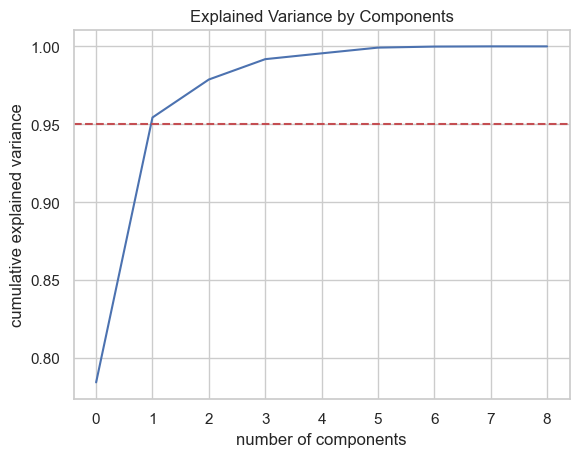

In [18]:
from sklearn.decomposition import PCA

pca_vars = df_copy[var_numeriques.columns]
dummies = df_copy[['status_type_photo', 'status_type_status', 'status_type_video']]

pca = PCA().fit(pca_vars)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [19]:
pca = PCA(.95).fit(pca_vars)
print("Nombre de components necessaris per explicar almenys el 95% de la variància:", pca.n_components_)

Nombre de components necessaris per explicar almenys el 95% de la variància: 2


In [20]:
pca = PCA(n_components = pca.n_components_)
pca.fit(pca_vars)
components = pca.transform(pca_vars)
df_pca = pd.DataFrame(components, columns=['pca1', 'pca2'])

#Tornem a unir els 2 dataframes

df_copy = pd.concat([df_pca, dummies], axis=1)
df_copy.head()

,pca1,pca2,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,1
1,-14.873807,-2.241151,1,0,0
2,3.371249,3.438150,0,0,1
3,-14.877890,-2.247779,1,0,0
4,-14.268106,-1.394616,1,0,0


# Exercici 1

### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Fem un gràfic de colze per a determinar el nombre òptim de clústers. L'objectiu és identificar el punt d'inflexió en el gràfic, on la disminució de la suma d'errors quadrats (SSE) s'aplana de manera significativa.

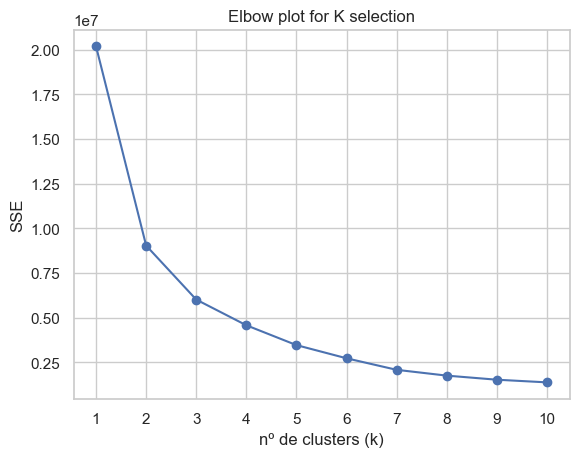

In [21]:
from sklearn.cluster import KMeans

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_copy)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow plot for K selection')
plt.xlabel('nº de clusters (k)')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.show()

In [22]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Nombre òptim de clusters:', kl.elbow)

Nombre òptim de clusters: 3


Apliquem l'algorisme K-Means amb el nombre òptim de clusters al nostre dataframe.

In [23]:
k_means = KMeans(n_clusters=kl.elbow, random_state=42)
k_means.fit(df_copy)

KMeans(n_clusters=3, random_state=42)

Prediccions del model:

In [24]:
y_pred = k_means.predict(df_copy)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Etiquetes dels clusters assignades a cada punt de dades:

In [25]:
df_copy['Cluster'] = y_pred
df_copy.head()

,pca1,pca2,status_type_photo,status_type_status,status_type_video,Cluster
0,48.141927,39.279885,0,0,1,1
1,-14.873807,-2.241151,1,0,0,0
2,3.371249,3.438150,0,0,1,0
3,-14.877890,-2.247779,1,0,0,0
4,-14.268106,-1.394616,1,0,0,0


In [26]:
# Nombre de dades per cluster:

cluster_counts = df_copy['Cluster'].value_counts()
cluster_percentages = cluster_counts / len(df_copy) * 100
result = pd.concat([cluster_counts, cluster_percentages], axis=1, keys=['Count', 'Percentage'])
result = result.reset_index().rename(columns={'index': 'Cluster'})
result = result.sort_values('Cluster').reset_index(drop=True)
result_string = result.to_string(index=False)
print(result_string)

 Cluster  Count  Percentage
       0   6452   92.184598
       1    475    6.786684
       2     72    1.028718


El primer cluster (nº0) és el que conté la gran majoria de dades (92.2%), seguit del segon cluster (nº1) amb un 6.8% i per últim el tercer cluster (nº2) amb un 1%.

In [27]:
# Calculem la mètrica de silhouette per avaluar la qualitat del clustering

# La funció gower_matrix s'utilitza per calcular una matriu de distàncies que tingui en compte variables mixtes 
# (numèriques i categòriques).

from sklearn.metrics import silhouette_score
from gower import gower_matrix

distance_matrix = gower_matrix(df_copy)

# Calculem el coeficient de Silhouette
silhouette_avg = silhouette_score(distance_matrix, df_copy['Cluster'])
print("Coeficient de Silhouette:", silhouette_avg)

Coeficient de Silhouette: 0.36997688


L'score de Silhouette es calcula per a cada observació i varia entre -1 i 1. Un valor alt de Silhouette indica que l'observació està ben classificada en el seu clúster i està allunyada dels altres clústers. D'altra banda, un valor baix o negatiu de Silhouette indica que l'observació podria haver estat assignada a un altre clúster proper.

El nostre score es relativament baix, per tant no és el millor model.

In [28]:
# Aplicarem MCA (PCA per a categòriques) a les variables dummies i tornarem a evaluar el model amb Silhouette

from prince import MCA

mca = MCA(n_components=2)
mca.fit(dummies)
mca_coordinates = mca.transform(dummies)
merged_data = pd.concat([pca_vars, mca_coordinates], axis=1)
silhouette_avg = silhouette_score(merged_data, df_copy['Cluster'])
print("Coeficiente de Silhouette:", silhouette_avg)

Coeficiente de Silhouette: 0.8534433406388667


El model millora moltíssim, passant de 0.37 a 0.85.

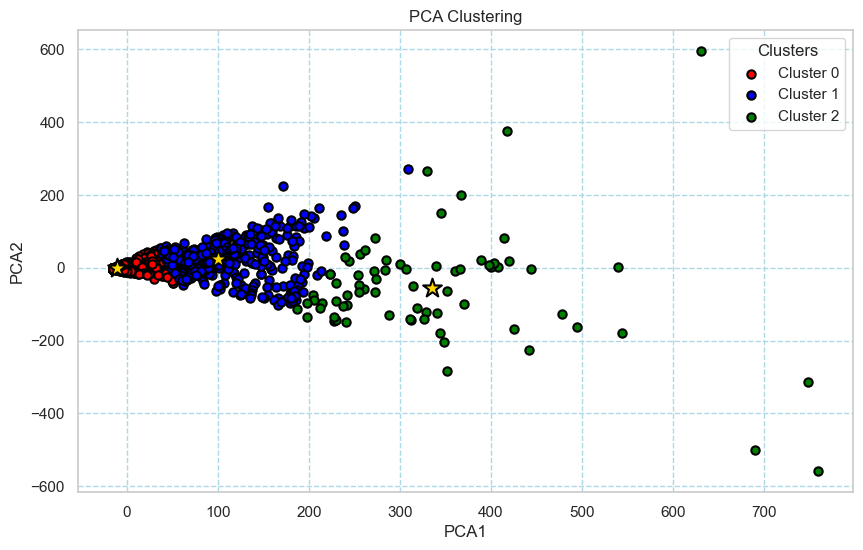

In [29]:
# Visualització gràfica:

pca_data = df_pca.values
cluster_labels = k_means.labels_
cluster_centers = k_means.cluster_centers_

unique_clusters = np.unique(cluster_labels)
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(10, 6))

for i, cluster in enumerate(unique_clusters):
    cluster_data = pca_data[cluster_labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], edgecolors='black', linewidths=1.5, label=f'Cluster {cluster}')

for i, centroid in enumerate(cluster_centers):
    ax.scatter(centroid[0], centroid[1], color='gold', marker='*', edgecolors='black', linewidths=1.5, s=200)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('PCA Clustering')
ax.legend(title='Clusters', loc='best')
ax.grid(color='lightblue', linestyle='--')
plt.show()

El gràfic de dispersió ens mostra com les dades es distribueixen en diferents grups després d'aplicar el PCA i utilitzar l'algoritme de K-means per a la segmentació. Cada punt en el gràfic representa una observació de les dades i està assignat a un clúster específic. Els centroides dels clústers es mostren com punts centrals. Amb aquesta visualització, podem observar com les dades es divideixen en grups i com estan agrupades al voltant dels centroides. Això ens dóna una idea de com les dades estan organitzades i com es relacionen amb els clústers identificats.

Podem veure que el cluster 0 és molt dens i que el cluster 2 està completament dispersat. El cluster 1 es trobaria enmig.

A més, és important destacar que els punts es troben solapats, el que indica que no hi ha una separació clara entre els clústers. Aquesta solapament pot ser un indicador de que les observacions tenen característiques similars i no es poden agrupar fàcilment en tres clústers ben definits.

# Exercici 2
### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

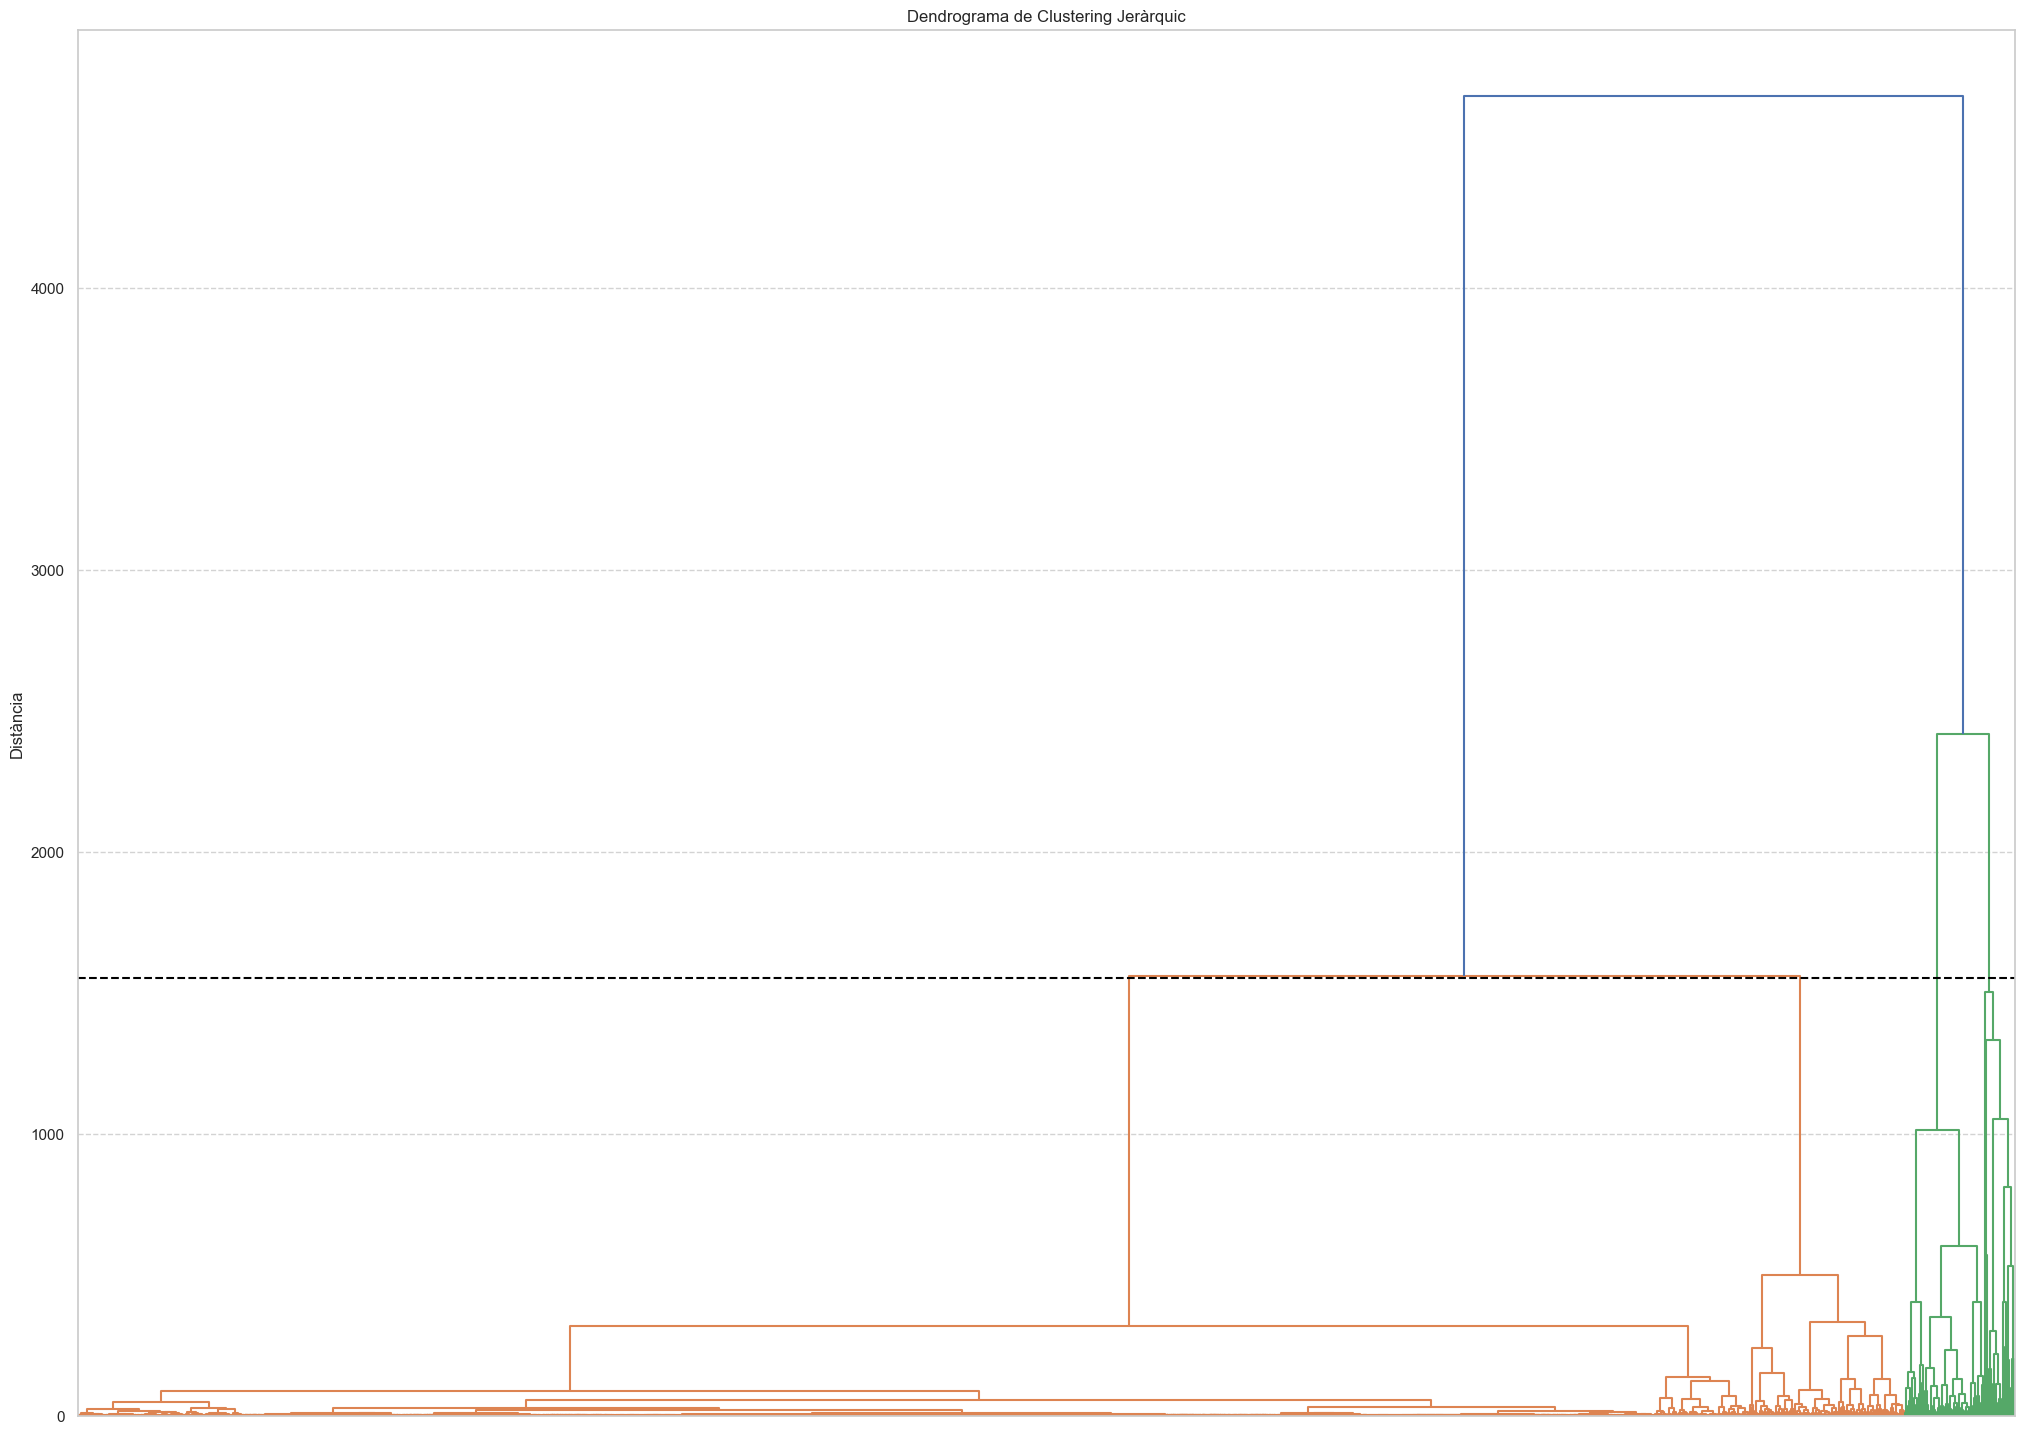

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

df_copy2 = df_copy.copy()

linkage_matrix = linkage(df_copy2, method='ward')

plt.figure(figsize=(25, 18))

dendrogram(linkage_matrix, no_labels=True)

plt.ylabel('Distància')
plt.title('Dendrograma de Clustering Jeràrquic')
plt.grid(color='lightgray', linestyle='--')
plt.axhline(y=1550, color='black', linestyle='--')

plt.show()

En un dendrograma, les branques representen les unions de grups a mesura que es realitza el procés de clustering jeràrquic. Cada branca al dendrograma mostra la distància entre els grups que es fusionen en aquest punt.

Les branques més a prop en l'eix x indiquen una major similitud entre els grups, mentre que les branques més separades indiquen més diferències entre els grups.

Hem posat un llindar de 1550 ja que és on veiem que s'allarguen més les branques. Quan hi ha un canvi brusc en les longituds de les branques, pot indicar una divisió significativa entre els grups. Aquests punts poden suggerir el nombre òptim de clusters, ja que representen una separació clara entre els grups en termes de distància. 

In [31]:
# Contem la quantitat de clusters que talla el nostre llindar
from scipy.cluster.hierarchy import fcluster

threshold = 1550
cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
num_clusters = len(set(cluster_labels))

print("Nombre de clusters:", num_clusters)

Nombre de clusters: 4


In [32]:
# Ajustem el model

from sklearn.cluster import AgglomerativeClustering

df_copy2 = df_copy2.drop(['Cluster'], axis=1)
clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering.fit_predict(df_pca)

df_copy2['ClusterDend'] = cluster_labels
df_copy2.head()

,pca1,pca2,status_type_photo,status_type_status,status_type_video,ClusterDend
0,48.141927,39.279885,0,0,1,0
1,-14.873807,-2.241151,1,0,0,0
2,3.371249,3.438150,0,0,1,0
3,-14.877890,-2.247779,1,0,0,0
4,-14.268106,-1.394616,1,0,0,0


In [33]:
# Calculem el coeficient de Silhouette

distance_matrix2 = gower_matrix(df_copy2)
silhouette_avg2 = silhouette_score(distance_matrix2, df_copy2['ClusterDend'])
print("Coeficient de Silhouette:", silhouette_avg2)

Coeficient de Silhouette: 0.33227605


Podem veure que el rendiment és molt més baix que en el K-means.

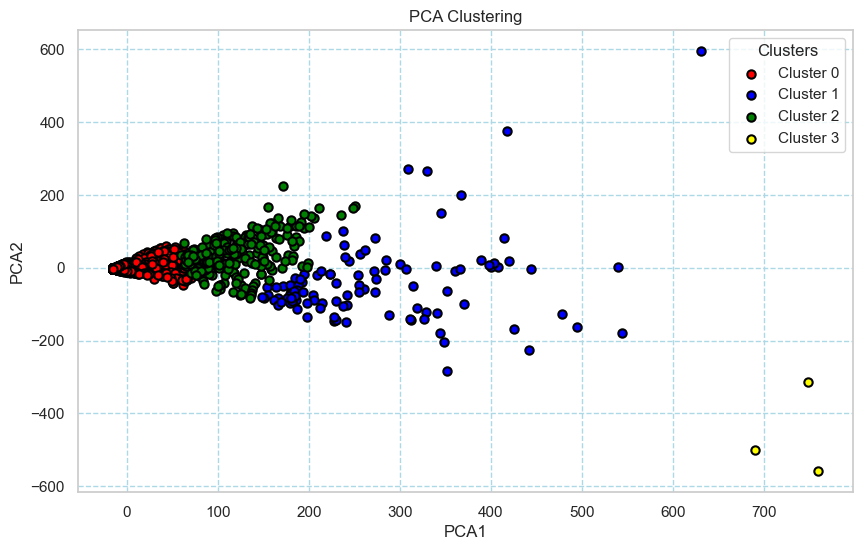

In [34]:
unique_clusters = np.unique(cluster_labels)
colors = ['red', 'blue', 'green', 'yellow']

fig, ax = plt.subplots(figsize=(10, 6))

for i, cluster in enumerate(unique_clusters):
    cluster_data = pca_data[cluster_labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], edgecolors='black', linewidths=1.5, label=f'Cluster {cluster}')


ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('PCA Clustering')
ax.legend(title='Clusters', loc='best')
ax.grid(color='lightblue', linestyle='--')
plt.show()

El gràfic de dispersió és molt similar al del K-means, però amb un cluster més, molt petit i dispers.

# Exercici 3

### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Ja ho hem fet amb ambdós models.